<a href="https://colab.research.google.com/github/franmazzaro/7506R-2C2023-GRUPO39/blob/main/7506R_TP1_GRUPO39_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold

In [177]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

In [178]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import math as math

In [179]:
# Importamos el dataset que trabajamos en el checkpoint 1
reservas = pd.read_csv('/content/sample_data/reservas_limpio.csv')

In [180]:
# Importamos el dataset de test
test = pd.read_csv('/content/sample_data/hotels_test.csv')

In [181]:
reservas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58593 entries, 0 to 58592
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58593 non-null  object 
 1   lead_time                       58593 non-null  int64  
 2   stays_in_weekend_nights         58593 non-null  int64  
 3   stays_in_week_nights            58593 non-null  int64  
 4   adults                          58593 non-null  int64  
 5   children                        58593 non-null  float64
 6   babies                          58593 non-null  int64  
 7   country                         58593 non-null  object 
 8   market_segment                  58593 non-null  object 
 9   distribution_channel            58593 non-null  object 
 10  is_repeated_guest               58593 non-null  int64  
 11  previous_cancellations          58593 non-null  int64  
 12  previous_bookings_not_canceled  

# Preprocesamiento de los datasets

borramos columnas asi queda igual a nuestro dataset de train.

In [182]:
test = test.drop(columns=['arrival_date_day_of_month',
                          'arrival_date_month',
                          'arrival_date_week_number',
                          'arrival_date_year',
                          'meal',
                          'reservation_status_date'])

## igualacion Dummies variable Country

In [183]:
reservas_c = (sorted(reservas["country"].dropna().unique()))
test_c = (sorted(test["country"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [184]:
reservas_limpio = pd.get_dummies(reservas, columns=["country"], drop_first=True, dtype='int64')

In [185]:
for country in paises_no_train:

  reservas_limpio["country_" + country] = np.int64(0)

In [186]:
test_limpio = pd.get_dummies(test, columns=["country"], drop_first=True, dtype='int64')

In [187]:
for country in paises_no_test:

  test_limpio["country_" + country] = np.int64(0)

In [188]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [189]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable hotel

In [190]:
reservas_h = (sorted(reservas_limpio["hotel"].dropna().unique()))
test_h = (sorted(test_limpio["hotel"].dropna().unique()))
paises_no_test = list(set(reservas_h) - set(test_h))
paises_no_train = list(set(test_h) - set(reservas_h))


In [191]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [192]:
for hotel in paises_no_train:
  hotel_ = hotel.replace(" ","_")
  reservas_limpio["hotel_" + hotel_] = np.int64(0)

In [193]:
test_limpio = pd.get_dummies(test_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [194]:
for hotel in paises_no_test:
  hotel_ = hotel.replace(" ","_")
  test_limpio["hotel_" + hotel_] = np.int64(0)

In [195]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [196]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable market_segment

In [197]:
reservas_c = (sorted(reservas_limpio["market_segment"].dropna().unique()))
test_c = (sorted(test_limpio["market_segment"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [198]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [199]:
for market_segment in paises_no_train:

  reservas_limpio["market_segment_" + market_segment] = np.int64(0)

In [200]:
test_limpio = pd.get_dummies(test_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [201]:
for market_segment in paises_no_test:

  test_limpio["market_segment_" + market_segment] = np.int64(0)

In [202]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [203]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable distribution_channel

In [204]:
reservas_c = (sorted(reservas_limpio["distribution_channel"].dropna().unique()))
test_c = (sorted(test_limpio["distribution_channel"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [205]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [206]:
for distribution_channel in paises_no_train:

  reservas_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [207]:
test_limpio = pd.get_dummies(test_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [208]:
for distribution_channel in paises_no_test:

  test_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [209]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [210]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable reserved_room_type

In [211]:
reservas_c = (sorted(reservas_limpio["reserved_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["reserved_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [212]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [213]:
for reserved_room_type in paises_no_train:

  reservas_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [214]:
test_limpio = pd.get_dummies(test_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [215]:
for reserved_room_type in paises_no_test:

  test_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [216]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [217]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable assigned_room_type

In [218]:
reservas_c = (sorted(reservas_limpio["assigned_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["assigned_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [219]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [220]:
for assigned_room_type in paises_no_train:

  reservas_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [221]:
test_limpio = pd.get_dummies(test_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [222]:
for assigned_room_type in paises_no_test:

  test_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [223]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [224]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable deposit_type

In [225]:
reservas_c = (sorted(reservas_limpio["deposit_type"].dropna().unique()))
test_c = (sorted(test_limpio["deposit_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [226]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [227]:
for deposit_type in paises_no_train:

  reservas_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [228]:
test_limpio = pd.get_dummies(test_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [229]:
for deposit_type in paises_no_test:

  test_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [230]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [231]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

## igualacion Dummies variable customer_type

In [232]:
reservas_c = (sorted(reservas_limpio["customer_type"].dropna().unique()))
test_c = (sorted(test_limpio["customer_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [233]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [234]:
for customer in paises_no_train:

  reservas_limpio["customer_type_" + customer] = np.int64(0)

In [235]:
test_limpio = pd.get_dummies(test_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [236]:
for customer in paises_no_test:

  test_limpio["customer_type_" + customer] = np.int64(0)

In [237]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [154]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

In [238]:
reservas_limpio.to_csv("/content/sample_data/reservas_dummies.csv", index=False)

In [299]:
test_limpio.to_csv("/content/sample_data/test_dummies.csv", index=False)

# Preprocesamiento para entrenar

Devolvemos solo las columnas int y float para poder entrenar el modelo. De esta forma podemos revisar si hicimos dummies para todas las variables categoricas, ya que estos pasan a ser de tipo de dato numerico.

In [240]:
reservas_sin_cuali = reservas_limpio[reservas_limpio.select_dtypes(include=["int64","float"]).columns.to_list()].copy()

In [241]:
test_sin_cuali = test_limpio[test_limpio.select_dtypes(include=["int","float"]).columns.to_list()].copy()

Ordenamos las columnas de train y test para que queden de igual forma las columnas. Si estan en diferente orden tira error.

In [242]:
reservas_sin_cuali = reservas_sin_cuali.reindex(sorted(reservas_sin_cuali.columns), axis=1)
test_sin_cuali = test_sin_cuali.reindex(sorted(test_sin_cuali.columns), axis=1)

In [243]:
# hacemos lo mismo que en el dataset de train de poner -1 a los valores faltantes de estas columnas para asignarlas a una categoria nula.
# De esta forma podemos identificarlos
test_sin_cuali['agent'] = test_sin_cuali['agent'].fillna(-1)
test_sin_cuali['company'] = test_sin_cuali['company'].fillna(-1)

eliminamos la columna target del dataset para entrenar y hacemos uno solo con esta.

In [244]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

# Probamos con un RandomizedSearchCV para buscar hiperparametros

Probamos con distinta cantidad de folds para ver cual devuelve mejor puntaje.

In [245]:
score = pd.DataFrame()
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(a, b, test_size=0.2, random_state=42)

for k in range(2, 10):


  n=10
  params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}


  folds=k


  kfoldcv = StratifiedKFold(n_splits=folds)


  base_tree = DecisionTreeClassifier(random_state=42)

  scorer_fn = make_scorer(f1_score)

  randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

  randomcv.fit(X_train_random, y_train_random);

  new_row = {'fold': k, "score": randomcv.best_score_, "best_params": randomcv.best_params_}
  score = score.append(new_row, ignore_index=True)

<ipython-input-245-d84334aa7b13>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-245-d84334aa7b13>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-245-d84334aa7b13>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-245-d84334aa7b13>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-245-d84334aa7b13>:32: FutureWarning: The frame.append method is deprecated and will be removed from p

In [246]:
score.head(10)

,fold,score,best_params
0,2,0.783327,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
1,3,0.788106,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
2,4,0.780426,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
3,5,0.786933,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
4,6,0.787676,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
5,7,0.787907,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
6,8,0.787509,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."
7,9,0.786229,"{'max_depth': 5, 'criterion': 'gini', 'ccp_alp..."


In [247]:
score[score['score'].max() == score['score']]

,fold,score,best_params
1,3,0.788106,"{'max_depth': 5, 'criterion': 'entropy', 'ccp_..."


con 7 folds devuelve el mejor score

In [248]:
print(randomcv.best_params_)

{'max_depth': 5, 'criterion': 'gini', 'ccp_alpha': 0.005555555555555556}


Utilizamos los hiperparametros encontrados

In [249]:
tree_model = DecisionTreeClassifier(criterion="gini",
                                         max_depth = 5,
                                         ccp_alpha=0.055555555555)

model_random = tree_model.fit(X_train_random, y_train_random)

In [250]:
y_pred_random = model_random.predict(X_test_random)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_random, y_pred_random)
precision = precision_score(y_test_random, y_pred_random)
recall = recall_score(y_test_random, y_pred_random)
f1 = f1_score(y_test_random, y_pred_random)
roc_auc = roc_auc_score(y_test_random, y_pred_random)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.6576499701339705
Precisión: 0.9950603732162459
Recuperación: 0.31172627235213207
F1-Score: 0.4747316051322336
AUC-ROC: 0.6551008119341551


Text(50.722222222222214, 0.5, 'True')

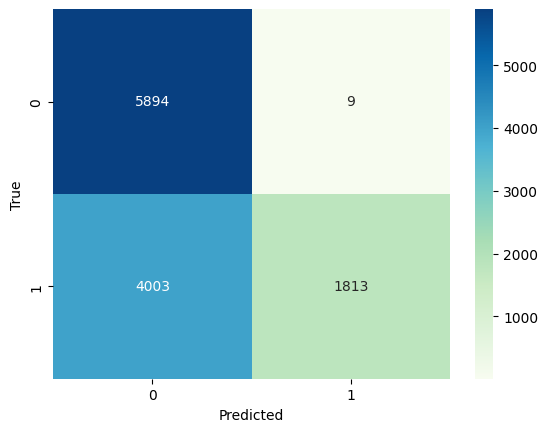

In [251]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_random, y_pred_random)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

predecimos con datset de test para subir la primer prediccion a kaggle

In [252]:
y_pred_random = randomcv.predict(test_sin_cuali)

In [253]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_random})

In [254]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [255]:
prediccion.to_csv('/content/sample_data/prediccion_random.csv', index = False)

# GridSearchCV

Queremos hacer otra prueba con GridSearchCV

In [256]:
from sklearn.model_selection import GridSearchCV

Buscamos con cuantos folds da el mejor score

In [257]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(a, b, test_size=0.2, random_state=42)

n=10
score_grid = pd.DataFrame()

for k in range(2,10):
  param_grid = {
    'criterion': ['gini', 'entropy'],           # Criterio de división del árbol (Gini o entropía)
    'splitter': ['best', 'random'],             # Estrategia de división de nodos (mejor o aleatorio)
    'max_depth': [None, 10, 20, 30, 40, 50],    # Profundidad máxima del árbol (None para ilimitada)
    'min_samples_split': [2, 5, 10],            # Mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],              # Mínimo de muestras requeridas en una hoja del árbol
    'max_features': ['auto', 'sqrt', 'log2']    # Número máximo de características a considerar en cada división
  }

  folds=k

  kfoldcv = StratifiedKFold(n_splits=folds)

  base_tree = DecisionTreeClassifier(random_state=42)

  scorer_fn = make_scorer(f1_score)

  gridcv = GridSearchCV(estimator=base_tree ,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True', n_jobs=-1)

  gridcv.fit(X_train_grid, y_train_grid);
  new_row = {'folds': k, "score": gridcv.best_score_, "best_params": gridcv.best_params_}
  score_grid = score_grid.append(new_row, ignore_index=True)



<ipython-input-257-422e5d6d1276>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-257-422e5d6d1276>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-257-422e5d6d1276>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-257-422e5d6d1276>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-257-422e5d6d1276>:28: FutureWarning: The frame.append method 

In [258]:
score_grid.head(10)

,folds,score,best_params
0,2,0.787598,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
1,3,0.788311,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
2,4,0.787122,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d..."
3,5,0.787115,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
4,6,0.787902,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
5,7,0.788154,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
6,8,0.787734,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."
7,9,0.787626,"{'ccp_alpha': 0.0, 'criterion': 'entropy', 'ma..."


In [259]:
tree_model = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 5,
                                         ccp_alpha=0.0)

model_grid_entropy = tree_model.fit(X_train_grid, y_train_grid)

In [260]:
y_pred_grid = model_grid_entropy.predict(X_test_grid)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_grid, y_pred_grid)
precision = precision_score(y_test_grid, y_pred_grid)
recall = recall_score(y_test_grid, y_pred_grid)
f1 = f1_score(y_test_grid, y_pred_grid)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.7507466507381176
Precisión: 0.6812773951158422
Recuperación: 0.9353507565337001
F1-Score: 0.7883486703862039
AUC-ROC: 0.7521070231931588


Podemos ver todos los scores

Text(50.722222222222214, 0.5, 'True')

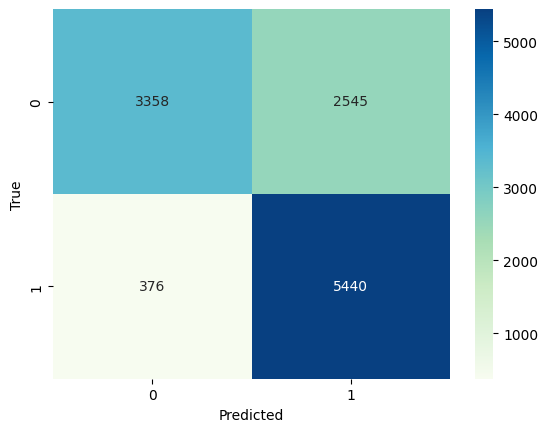

In [261]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Con entropy predice correcto 8792 de 11718

Probamos con Gini

In [262]:
tree_model = DecisionTreeClassifier(criterion="gini",
                                         max_depth = 5,
                                         ccp_alpha=0.0)

model_grid_gini = tree_model.fit(X_train_grid, y_train_grid)

In [263]:
y_pred_grid = model_grid_gini.predict(X_test_grid)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_grid, y_pred_grid)
precision = precision_score(y_test_grid, y_pred_grid)
recall = recall_score(y_test_grid, y_pred_grid)
f1 = f1_score(y_test_grid, y_pred_grid)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.791449782404642
Precisión: 0.7957894736842105
Recuperación: 0.7799174690508941
F1-Score: 0.7877735324765544
AUC-ROC: 0.791364799238305


Text(50.722222222222214, 0.5, 'True')

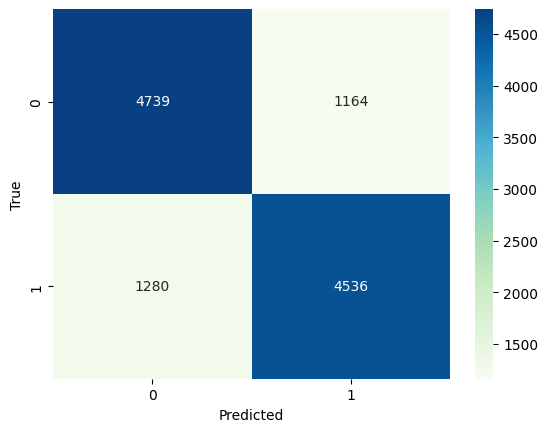

In [264]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Con gini predice correcto 9278 de 11718. Mejor que con entropy.

Lo guardamos en un dataset para subir a kaggle.

In [266]:
y_pred_grid = model_grid_gini.predict(test_sin_cuali)

In [267]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_grid})

In [268]:
prediccion.to_csv('/content/sample_data/prediccion_grid.csv', index = False)

# Probamos ahora haciendo una normalizacion y balanceo en el dataset

In [269]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [270]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

In [271]:
b.value_counts()

0    29487
1    29106
Name: is_canceled, dtype: int64

Vemos que hay una proporcion cercana al 50% de cada una, por lo que en este caso el balanceo puede cambiar muy poco el resultado del score.

In [272]:
# Normalización Min-Max en los datos de entrenamiento
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(a)

In [273]:
# Balanceo de clases
class_0 = X_train_normalized[b == 0]
class_1 = X_train_normalized[b == 1]

In [274]:
# Balanceo de clases (sobremuestreo de la clase minoritaria)

# Selecciona los ejemplos de la clase mayoritaria (clase "0")
class_0 = X_train_normalized[b == 0]

# Selecciona los ejemplos de la clase minoritaria (clase "1")
class_1 = X_train_normalized[b == 1]

# Realiza sobremuestreo de la clase minoritaria (clase "1")
# - replace=True: Permite muestrear con reemplazo
# - n_samples=len(class_0): Genera tantas muestras de la clase "1" como ejemplos de la clase "0"
class_0_oversampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Combina los datos equilibrados en X_train_balanced y y_train_balanced
# - np.vstack: Apila verticalmente los arrays
# - np.hstack: Concatena horizontalmente los arrays
X_train_balanced = np.vstack((class_0, class_0_oversampled))
y_train_balanced = np.hstack((b[b == 0], np.ones(len(class_0))))

In [275]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_tree = DecisionTreeClassifier(random_state=42)

grid_search_2 = GridSearchCV(base_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_2.fit(X_train_grid, y_train_grid)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [276]:
print("Mejores hiperparámetros encontrados:", grid_search_2.best_params_)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [277]:
tree_model = DecisionTreeClassifier(criterion="entropy",
                                         max_depth = None,
                                         min_samples_leaf =  1,
                                         min_samples_split = 2)

model_grid_2 = tree_model.fit(X_train_grid, y_train_grid)

In [278]:
y_pred_grid_2 = model_grid_2.predict(X_test_grid)

accuracy = accuracy_score(y_test_grid, y_pred_grid_2)
precision = precision_score(y_test_grid, y_pred_grid_2)
recall = recall_score(y_test_grid, y_pred_grid_2)
f1 = f1_score(y_test_grid, y_pred_grid_2)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid_2)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.8845273420941077
Precisión: 0.86229714825902
Recuperación: 0.918134541184365
F1-Score: 0.8893402664933376
AUC-ROC: 0.8841615455321894


Text(50.722222222222214, 0.5, 'True')

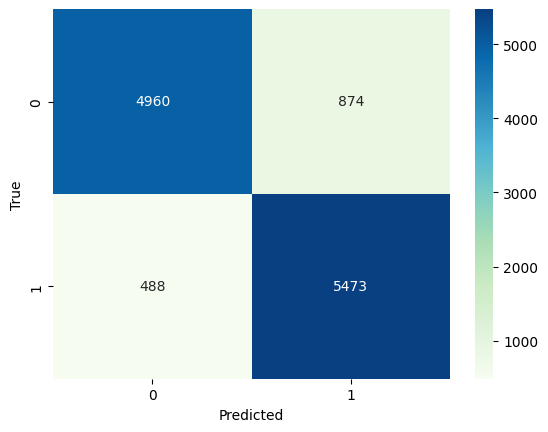

In [279]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid_2)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Podemos ver que aumentaron significativamente los scores comparando a los anteriores sin normalizacion y balanceo.

busquemos con cuantos folds nos da el mejor score, usando los hiperparametros encontrados anteriormente.

In [280]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

score_grid = pd.DataFrame()
for k in range(2, 10):

  param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
  }

  base_tree = DecisionTreeClassifier(random_state=42)

  grid_search = GridSearchCV(base_tree, param_grid, cv=k, scoring='accuracy', n_jobs=-1)


  grid_search.fit(X_train_grid, y_train_grid)

  new_row = {'fold': k, "score": grid_search.best_score_}
  score_grid = score_grid.append(new_row, ignore_index=True)

<ipython-input-280-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-280-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-280-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-280-7e62299a4321>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_grid = score_grid.append(new_row, ignore_index=True)
<ipython-input-280-7e62299a4321>:21: FutureWarning: The frame.append method 

In [281]:
score_grid.head(15)

,fold,score
0,2.0,0.853028
1,3.0,0.862608
2,4.0,0.865449
3,5.0,0.869243
4,6.0,0.870260
5,7.0,0.872507
6,8.0,0.871765
7,9.0,0.872910


In [282]:
score_grid[score_grid['score'].max() == score_grid['score']]

,fold,score
7,9.0,0.87291


Mejora mucho la prediccion

Generamos dataset para subir a kaggel

In [283]:
y_pred_grid_2 = model_grid_2.predict(test_sin_cuali)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [284]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_grid_2})

In [285]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1.0
1,aba9aac2-4495-4645-a60e-90328713c999,0.0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0.0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0.0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1.0


Vemos que is_canceled es un float. Lo pasamos a int para poder subir el archivo a kaggel.

In [286]:
prediccion['is_canceled'] = prediccion['is_canceled'].astype(int)

In [287]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [288]:
prediccion.to_csv('/content/sample_data/prediccion_grid_hiperparametros_balanceo_normalizacion.csv', index = False)

# Queremos ver la diferencia de puntaje segun el hiperparametro scoring

Queremos ver cual score es el mejor para entrenar

Pasamos los mejores params_grid y 7 folds

In [289]:
score_types = pd.DataFrame()

lista_scorings = ['f1','accuracy','recall','precision','roc_auc','neg_log_loss','neg_mean_absolute_error','neg_mean_squared_error','r2']

X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

for k in lista_scorings:

  clf = DecisionTreeClassifier(random_state=42)

  param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
  }


  grid_search = GridSearchCV(clf, param_grid, cv=7, scoring=k, n_jobs=-1)

  grid_search.fit(X_train_grid, y_train_grid)

  y_pred = grid_search.predict(X_test_grid)

  new_row = {'scoring': k, "score": f1_score(y_test_grid, y_pred), "best_params": grid_search.best_params_}
  score_types = score_types.append(new_row, ignore_index=True)

<ipython-input-289-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-289-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-289-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-289-b421fecb08a7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_types = score_types.append(new_row, ignore_index=True)
<ipython-input-289-b421fecb08a7>:26: FutureWarning: The frame.append

In [290]:
score_types.head(10)

,scoring,score,best_params
0,f1,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,accuracy,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,recall,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
3,precision,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
4,roc_auc,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
5,neg_log_loss,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
6,neg_mean_absolute_error,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
7,neg_mean_squared_error,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
8,r2,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."


In [291]:
score_types[score_types['score'].max() == score_types['score']]

,scoring,score,best_params
0,f1,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,accuracy,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,recall,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
3,precision,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
4,roc_auc,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
5,neg_log_loss,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
6,neg_mean_absolute_error,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
7,neg_mean_squared_error,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."
8,r2,0.889738,"{'criterion': 'entropy', 'max_depth': None, 'm..."


con todos los scorings devuelve el mismo puntaje.

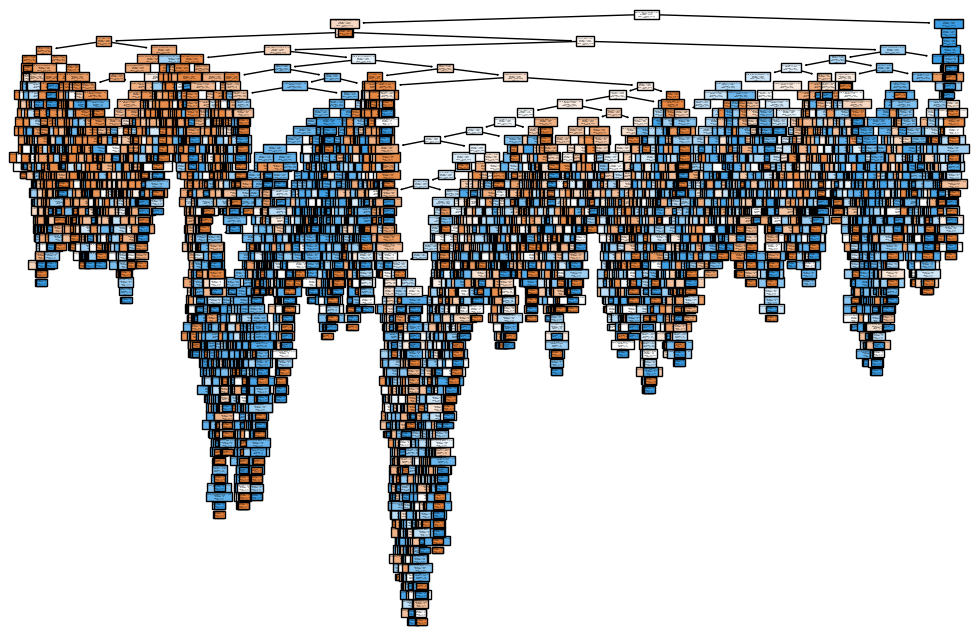

In [292]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_model = grid_search_2.best_estimator_


plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=a.columns, class_names=["0", "1"])
plt.show()

Mostramos un arbol representativo de los datos donde se pueda ver mejor.

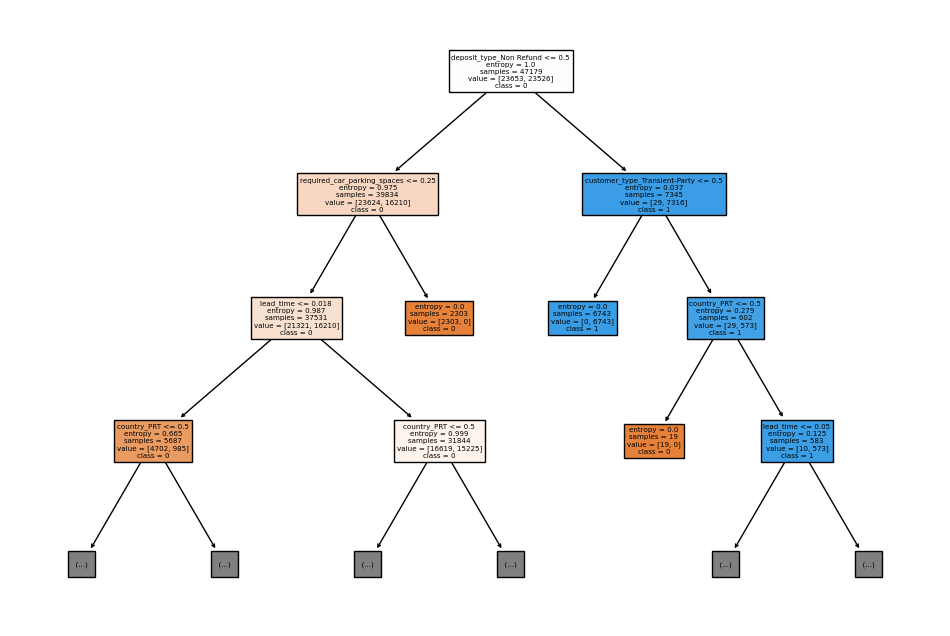

In [293]:
best_model = grid_search_2.best_estimator_


plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=a.columns, class_names=["0", "1"],max_depth=3)
plt.show()

